In [1]:
# Helper Function: Helps to find intervalls in Integer Data
# This Function will give you All Intervalls in an Integerarray.
# E.g: find_intervalls([1,2,3,5,6,7]) -> [(1,3),(5,7)]

def find_intervalls(data, *, sort=True, ending_plus=0):
    if sort:
        data.sort()
    found_intervalls = []
    last = False
    reset = True
    for i in data:
        if reset:
            left = last or i
            right = i
            reset = False
            continue
        if right+1 == i:
            right += 1
        else:
            found_intervalls.append((left, right + ending_plus))
            last = i
            reset = True
    found_intervalls.append((left, right))
        
    return found_intervalls

# Pretty Visualization 🌏🌌 of Storms
by Viktor Reichert

Dataset: [Asian Typhoon Dataset](https://www.kaggle.com/datasets/skyil7/asian-typhoon-dataset-1951-2022-rsmc-best-track) provided by [GIOPIK](https://www.kaggle.com/skyil7)

## Overview

In this Notebook we will create a visualization of path of the center of typhoons in the provided Dataset. 

Our results can be compared with the data and visualizations from http://www.digital-typhoon.org/ (e.g. [Nanmadol](http://agora.ex.nii.ac.jp/digital-typhoon/summary/wnp/l/202214.html.en) from 2022).

Then we will make some basic Dataanalysis. Just for fun and training.

I provided a version of the Visualizer using ipywidgets to pick a year and typhoon, but it is not visable in kaggle view mode. If you want to see it, fork this Notebook and watch in Editor. It should look like this:

<a href="https://imgur.com/3XG1DxC"><img src="https://i.imgur.com/3XG1DxC.gif" title="source: imgur.com" /></a>

## Loading and preparing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Display world map.
import folium

# Calculate distance of two points based on longitude and latitude.
from geopy.distance import distance

The Dataset contains two files.
* **typhoon_data.csv** contains detailed information about ervery dokumented typhoon. We will remove a number of coloumns and add new ones based on our needs.
* **typhoon_info.csv** contains one row of information for each typhoon. The most (and for now only) interessing one is the **name** of the typhoon, if it has one. We can use this as basis for a summary dataframe.

In [3]:
df_data = pd.read_csv('../input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_data.csv', index_col=[0])
df_data

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
0,5101,1951,2,19,6,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,5101,1951,2,19,12,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,5101,1951,2,19,18,Tropical Depression,230,1421,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,5101,1951,2,20,0,Tropical Cyclone of TS intensity or higher,250,1460,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,5101,1951,2,20,6,Tropical Cyclone of TS intensity or higher,276,1506,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68619,2225,2022,12,11,12,Tropical Storm,182,1270,1000,35.0,No direction,0.0,0.0,(symmetric circle),90.0,90.0,
68620,2225,2022,12,11,18,Tropical Storm,190,1281,998,40.0,No direction,0.0,0.0,(symmetric circle),90.0,90.0,
68621,2225,2022,12,12,0,Tropical Storm,200,1293,998,40.0,No direction,0.0,0.0,North,150.0,90.0,
68622,2225,2022,12,12,6,Tropical Storm,204,1310,1002,35.0,No direction,0.0,0.0,North,150.0,90.0,


In [4]:
df_info = pd.read_csv('../input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_info.csv', index_col=[0])
df_info

,International number ID,Tropical cyclone number ID,Flag of the last data line,Difference between the time of the last data and the time of the final analysis,Name,Latest Revision
0,5101,NaN,Dissipation,6,,1990-10-17
1,5102,NaN,Dissipation,6,GEORGIA,2013-03-19
2,5103,NaN,Dissipation,6,HOPE,1989-06-01
3,5104,NaN,Dissipation,6,IRIS,2013-03-19
4,5105,NaN,Going out,0,JOAN,1991-07-16
...,...,...,...,...,...,...
1876,2221,26.0,Going out,0,HAITANG,2023-01-12
1877,2222,28.0,Dissipation,6,NALGAE,2023-01-12
1878,2223,29.0,Dissipation,6,BANYAN,2023-01-17
1879,2224,30.0,Dissipation,6,YAMANEKO,2023-01-19


### Discription of Columns in typhoon_data.csv

We will concentrate on the following columns:
* **International number ID** of the storm is an Integer. The First two digits are the year of the storm, the last two is an ascending integer index startig at 1. If any leading digits are zero, they are omitted (e.g. second storm in 2004: 402; tenth storm in 1960: 6010)
* **year** of the storm. Integer ranging from 1951 up to 2022.
* **month** of the storm. Integer ranging from 1 to 12.
* **hour** of the storm. Integer ranging from 0 to 23.
* **grade** of the storm. Categorical data with the following options: 'Tropical Depression' 'Tropical Cyclone of TS intensity or higher', 'Extra-tropical Cyclone', 'Just entering into the responsible area of RSMC Tokyo-Typhoon Center', 'Severe Tropical Storm', 'Tropical Storm', 'Typhoon'
* **Latitude of center** of the storm scaled by a factor of 10, saved as in Integer.
* **Longitude of center** of the storm scaled by a factor of 10, saved as an Integer.

The following Columns will not be of interest for us right now:
* **Central pressure**
* **Maximum sustained wind speed**
* **Direction of the longest radius of 50kt winds or greater**
* **The longeast radius of 50kt winds or greater**
* **The shortest radius of 50kt winds of greater**
* **Direction of the longest radius of 30kt winds or greater**
* **The longeast radius of 30kt winds or greater**
* **The shortest radius of 30kt winds of greater**
* **Indicator of landfall or passage** is either ' ' or '#'. '#' means, that the center of the Storm has reached land. First appearance of '#' is in 1991.


### Reduction and Extension of the Dataframe
We are removing parts of the dataframe that are not interessting right now and rename the remaining for easier access.

We are combining 'year','month','day' and 'hour' to a single column **date** representing the date. If we want to get access to the original columns the can use [`df.date.dt.year`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html), [`df.date.dt.month`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html), [`df.date.dt.day`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html) and[`df.date.dt.hour`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html).

We then devide the **lati**tude and **long**itude by 10, so they represent the real world latitude and longitude.

We calculate the **distance** each zyclone moved between two measurements. This is quite involved, so we use [geopy.distance.distance](https://geopy.readthedocs.io/en/stable/#module-geopy.distance) which expects two pairs of (lati,long).

Based on the distance and date we can calculate the **speed** of the typhoon center between two measurements.

The first distance and speed for each typhoon will be `np.nan` since we don't have an antecedent to calculate it.

In [5]:
# renaming and keeping of important columns
df = df_data.rename(columns={
    'International number ID':'id',
    'Latitude of the center':'lati',
    'Longitude of the center':'long',
})[['id', 'grade', 'lati', 'long']]

# adding new column 'date'. Will have dtype datetime64[ns]
df['date'] = pd.to_datetime(df_data[['year','month','day','hour']])

df.long /= 10
df.lati /= 10

# Make grade categorical Datatype
df.grade = df.grade.astype('category')

# Define method for vectorization.
def calc_distance(lati_1, long_1, lati_2, long_2):
    return distance((lati_1, long_1), (lati_2, long_2)).km

# Calculate traveled distance
# Calculation is taking some seconds.

for id, group in df.groupby('id'):
    distances = np.vectorize(calc_distance)(group.lati[:-1],
                                            group.long[:-1],
                                            group.lati[1:],
                                            group.long[1:])
    df.loc[group.index, 'distance'] = np.concatenate(([np.nan], distances))


# Calculate speed of zycloon center.
df['speed'] = df.distance / df.date.diff().astype('timedelta64[h]')

df

,id,grade,lati,long,date,distance,speed
0,5101,Tropical Depression,20.0,138.5,1951-02-19 06:00:00,NaN,NaN
1,5101,Tropical Depression,20.0,138.5,1951-02-19 12:00:00,0.000000,0.000000
2,5101,Tropical Depression,23.0,142.1,1951-02-19 18:00:00,499.438256,83.239709
3,5101,Tropical Cyclone of TS intensity or higher,25.0,146.0,1951-02-20 00:00:00,454.433324,75.738887
4,5101,Tropical Cyclone of TS intensity or higher,27.6,150.6,1951-02-20 06:00:00,542.135437,90.355906
...,...,...,...,...,...,...,...
68619,2225,Tropical Storm,18.2,127.0,2022-12-11 12:00:00,122.891745,20.481958
68620,2225,Tropical Storm,19.0,128.1,2022-12-11 18:00:00,146.009689,24.334948
68621,2225,Tropical Storm,20.0,129.3,2022-12-12 00:00:00,167.694532,27.949089
68622,2225,Tropical Storm,20.4,131.0,2022-12-12 06:00:00,183.108313,30.518052


In [6]:
df.dtypes

id                   int64
grade             category
lati               float64
long               float64
date        datetime64[ns]
distance           float64
speed              float64
dtype: object

### Checking for missing data 😈
In this case, there is no missing Data in our data expect for the new distance and speed columns. Here we miss exactly one value for each typhoon. Perfect.

In [7]:
df.isnull().sum()

id             0
grade          0
lati           0
long           0
date           0
distance    1881
speed       1881
dtype: int64

In [8]:
df.id.unique().size

1881

## Visualiziation 🌏🌌

Let's create a Visualization to see for each Storm, where it went.

We draw a blue PolyLine indicating the passage of the center of the typhoon.

Every dot in the line is a measurement of the typhoon. Orange dots represent a new day.

The Pin is the first measurement of the typhon.

In [9]:
def get_map_by_id(id):
    typhoon = df.query('id == @id')
    return get_map(typhoon[['lati', 'long']].to_records(index=False),
                   typhoon.date)

def get_map(coordinates, dates):
    m = folium.Map()
    m.fit_bounds(coordinates.tolist())
    folium.PolyLine(locations=coordinates, color='blue').add_to(m)
    folium.Marker(location=coordinates[0], popup="start").add_to(m)
    for coord, date in zip(coordinates, dates):
        folium.Circle(location=coord,
                     color='yellow' if date.hour else 'orange').add_to(m)
    return m

In [10]:
get_map_by_id(1920)

Hidden: Visalization wit dropdown menu for all years and corresponding typhoon id's. Fork notebook to watch.

In [11]:
# Pretty Visualization:

min_year = df.date.dt.year.min()
max_year = df.date.dt.year.max()

year = widgets.Dropdown(
    options=range(min_year, max_year+1),
    value=min_year,
    description='year'
)

typhon_id = widgets.Dropdown(
    options=df.loc[df.date.dt.year == min_year]['id'].unique(),
    description='storm id'
)

output_element = widgets.Output()
output_element.layout.height = '588px'
output_element.layout.width = '980px'

def display_map(id):
    with output_element:
        output_element.clear_output()
        display(get_map_by_id(id))

def handle_year_change(change):
    typhon_id.options = df.loc[df.date.dt.year == change.new]['id'].unique()
    
def handle_id_change(change):
    display_map(change.new)

               
year.observe(handle_year_change, names='value') 
typhon_id.observe(handle_id_change, names='value')
display_map(typhon_id.value)

widgets.VBox([year, typhon_id, output_element])

## Question based Data Analysis

Let's habe some fun the the data and ask some questions:

### How long where longest Storms?

For this, we need to calculate die difference between the first and last datapoint for the typhons. Since we have calculated the date of each measurement we can use the datatype and just ask for the min and max. Then we kann take the difference between the two columns.

In [12]:
diff_series = df.groupby('id') \
                .date.agg(['min', 'max']) \
                .diff(axis=1)['max']

df_summary = pd.merge(df_info[['International number ID', 'Name']],
                      diff_series,
                      left_on='International number ID',
                      right_index=True) \
               .rename(columns={'International number ID': 'id',
                                'Name':'name',
                                'max':'duration'})

df_summary.sort_values('duration', ascending=False).head(10)

,id,name,duration
583,7207,RITA,22 days 00:00:00
950,8614,WAYNE,21 days 18:00:00
313,6309,BESS,21 days 18:00:00
636,7408,GILDA,21 days 06:00:00
1730,1705,NORU,21 days 00:00:00
451,6722,OPAL,21 days 00:00:00
377,6515,JEAN,21 days 00:00:00
864,8305,ABBY,20 days 00:00:00
949,8613,VERA,20 days 00:00:00
686,7605,OLGA,19 days 18:00:00


### How long are Storm measured?

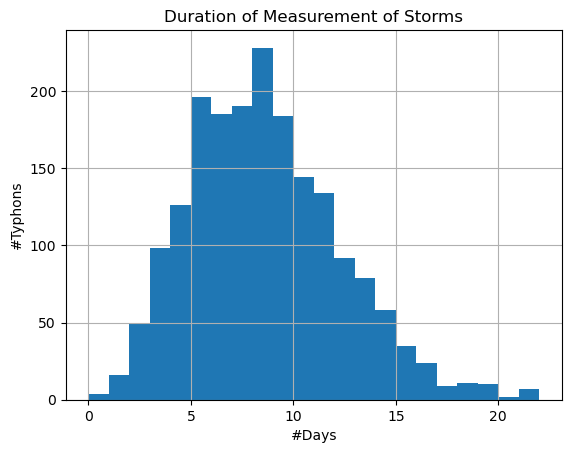

In [13]:
ax = df_summary.duration.astype('timedelta64[D]').hist(bins=22)
ax.set_title('Duration of Measurement of Storms')
ax.set_ylabel('#Typhons')
ax.set_xlabel('#Days')
plt.show(ax)

Different kinds of Typhons: 

Tropical Depression                                                     19034
Tropical Cyclone of TS intensity or higher                              14326
Typhoon                                                                 10984
Tropical Storm                                                           9311
Extra-tropical Cyclone                                                   8042
Severe Tropical Storm                                                    6895
Just entering into the responsible area of RSMC Tokyo-Typhoon Center       32
Name: grade, dtype: int64


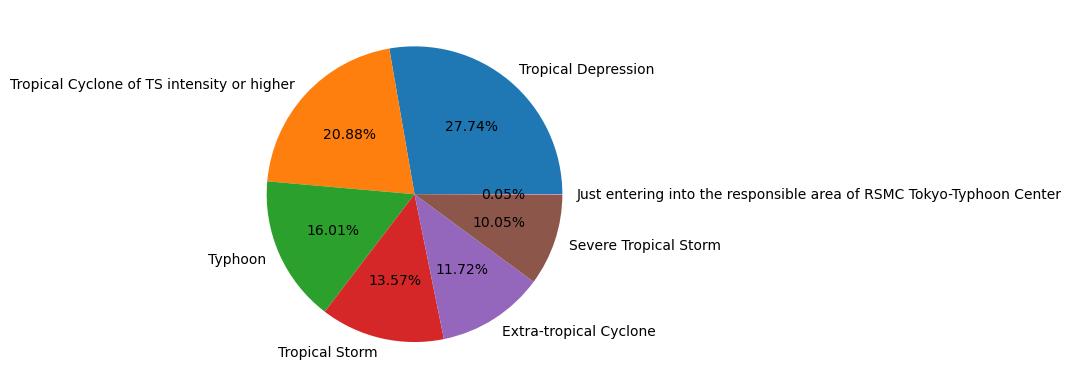

In [14]:
print('Different kinds of Typhons: \n')
print(df['grade'].value_counts())
plt.pie(df['grade'].value_counts(),
       labels=df['grade'].value_counts().index,
       autopct='%1.2f%%')
plt.show()

Text(0, 0.5, 'Storms with x Messurments')

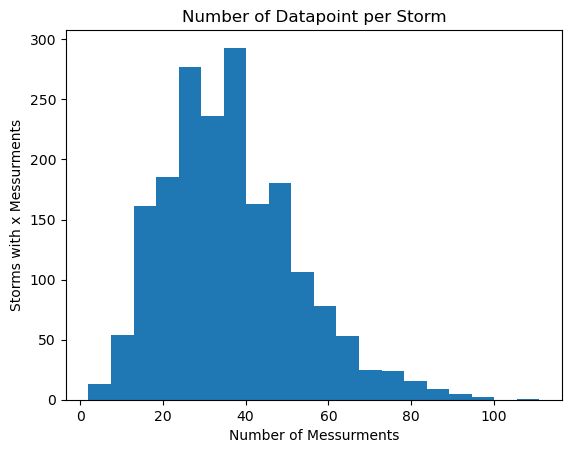

In [15]:
ax = df['id'].value_counts().plot(kind='hist', bins=20, title='Number of Datapoint per Storm')
ax.set_xlabel('Number of Messurments')
ax.set_ylabel('Storms with x Messurments')

Create a Dataframe for the distances and speeds of each storm.